# Intro

This is a notebook summarizing experiments run in Summer 2024 by Nick Huang investigating the various use cases and performance of Prediction Powered Inference (PPI).

The equation for PPI variance, which is a key focus is given by 
\begin{equation}
    \sqrt{\frac{\hat{\sigma}^2_{f - Y}}{n} + \frac{\hat{\sigma}^2_{f}}{N}} 
\end{equation}

Recall that the variance of the classical estimator is given by

\begin{equation}
    \sqrt{\frac{\hat{\sigma}^2_{Y}}{n}}
\end{equation}

And the third method that we will be using, is naive (imputation) method, in which we have the model predict *all* outputs, and treat them as true data to perform inference. In this case, our variance becomes.

\begin{equation}
    \sqrt{\frac{\hat{\sigma}^2_{f}}{n + N}} 
\end{equation}

Nmaely there are 3 terms that we want to modify, $n, N, \sigma^2_{f - Y}$

In [1]:
# Imports

import distributions as dist
import numpy as np
import matplotlib.pyplot as plt
import ppi
import ppi_py
import scipy.stats as stats
import pandas as pd
import ml_models as ml
import distributions as dist

import yaml
import os
import sys
import argparse
import plotting
import copy

c:\Users\Ziyu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Experiment 1

### GOOD n, N, $\sigma^2_{f - Y}$

Varied $n$, fixed $N = 10000$, linear data, linear regression.

$n \ll N$

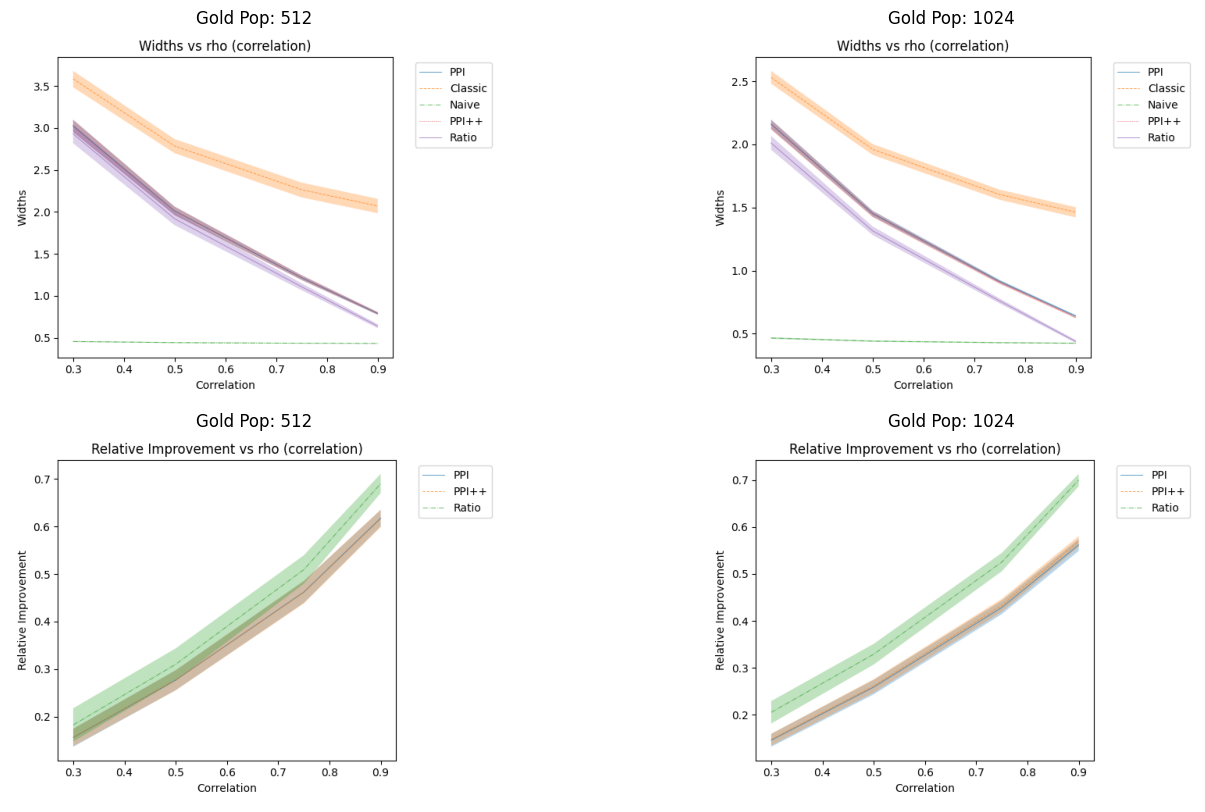

In [5]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/512g_l_reg_2024-08-14-23-50-59/plots/widthsplotwithratio.png'
gold_16 = '../experiments/Experiment_1_new/1024g_l_reg_2024-08-14-23-54-03/plots/widthsplotwithratio.png'
gold_128_ri = '../experiments/Experiment_1_new/512g_l_reg_2024-08-14-23-50-59/plots/relativeimprovementwithratio.png'
gold_16_ri = '../experiments/Experiment_1_new/1024g_l_reg_2024-08-14-23-54-03/plots/relativeimprovementwithratio.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 512')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 1024')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 512')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 1024')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


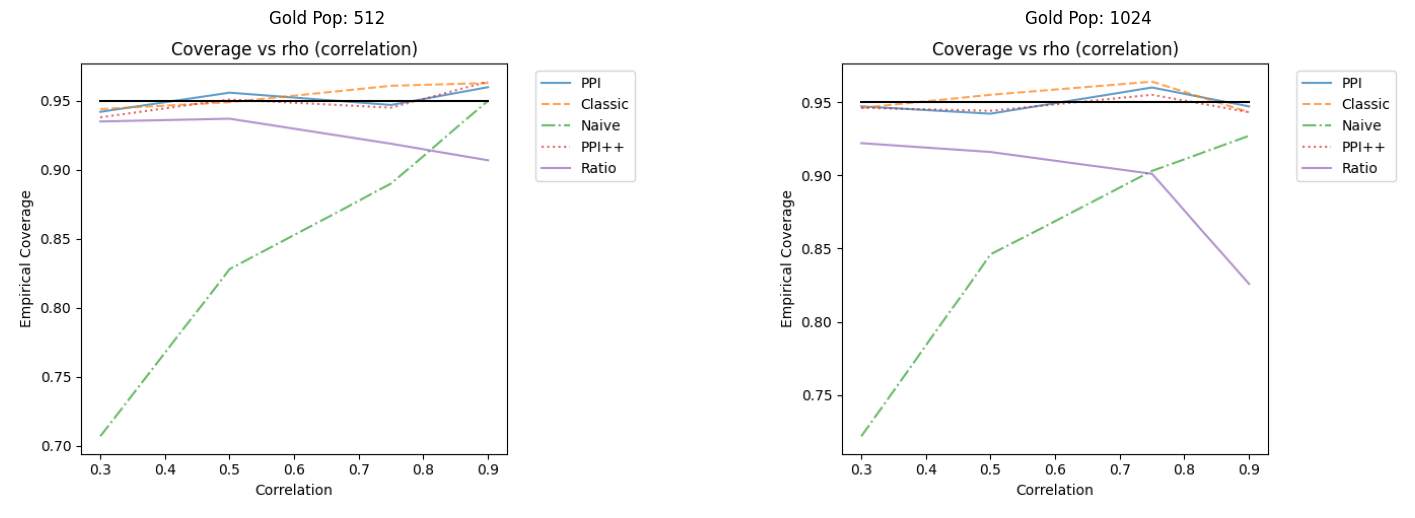

In [10]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/512g_l_reg_2024-08-14-23-50-59/plots/coverageplotwithratio.png'
gold_16_cov = '../experiments/Experiment_1_new/1024g_l_reg_2024-08-14-23-54-03/plots/coverageplotwithratio.png'

# Display the PNG file
img_128_cov = plt.imread(gold_128_cov)
img_16_cov = plt.imread(gold_16_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 512')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 1024')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

#### BAD n GOOD N, MODEL

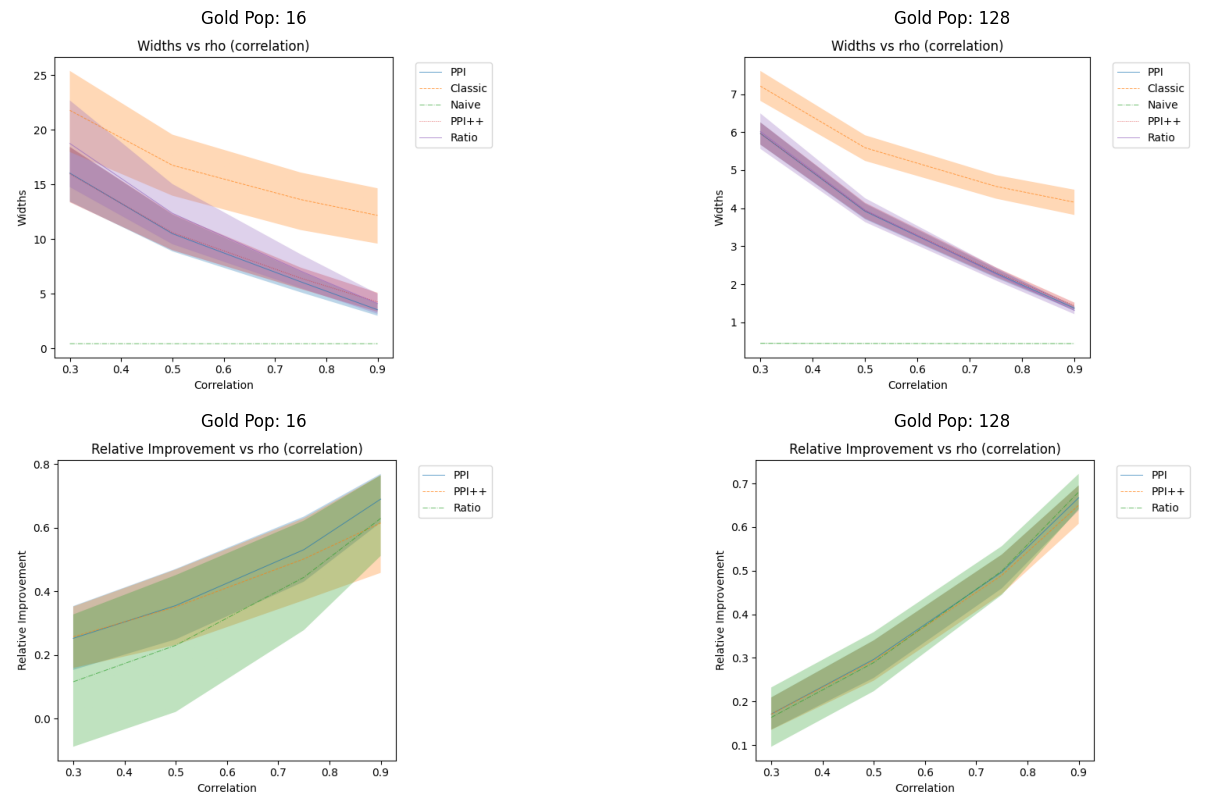

In [9]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/16g_l_reg_2024-08-13-23-12-17/plots/widthsplotwithratio.png'
gold_16 = '../experiments/Experiment_1_new/128g_l_reg_2024-08-13-23-12-39/plots/widthsplotwithratio.png'
gold_128_ri = '../experiments/Experiment_1_new/16g_l_reg_2024-08-13-23-12-17/plots/relativeimprovementwithratio.png'
gold_16_ri = '../experiments/Experiment_1_new/128g_l_reg_2024-08-13-23-12-39/plots/relativeimprovementwithratio.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 16')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 128')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 16')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 128')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


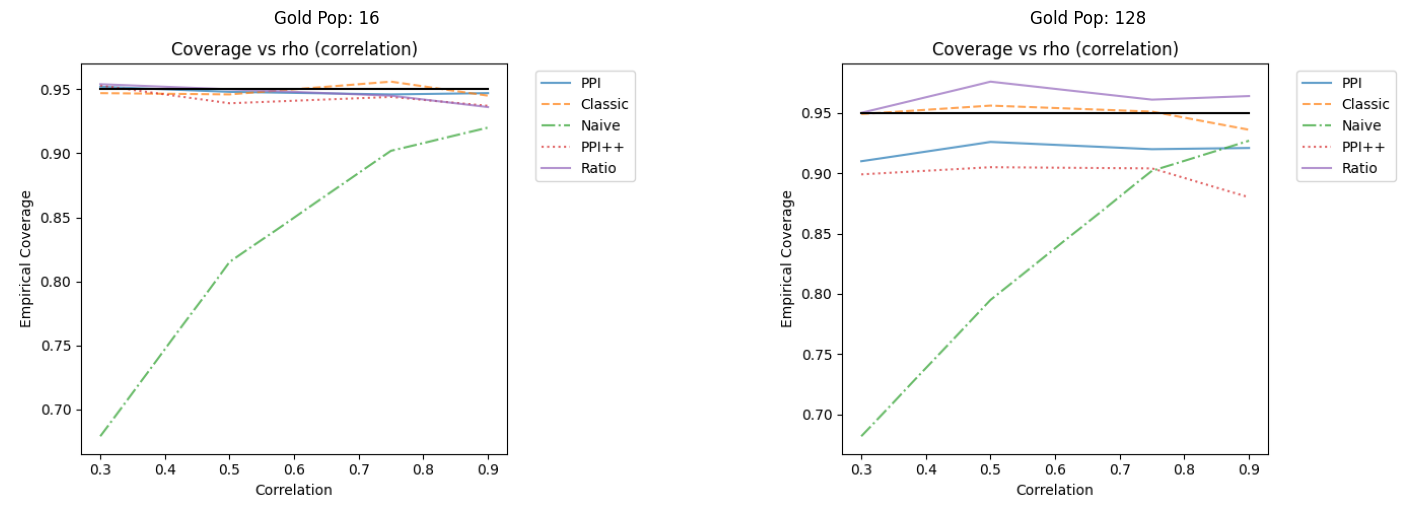

In [12]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/16g_l_reg_2024-08-13-23-12-17/plots/coverageplotwithratio.png'
gold_16_cov = '../experiments/Experiment_1_new/128g_l_reg_2024-08-13-23-12-39/plots/coverageplotwithratio.png'

# Display the PNG file
img_128_cov = plt.imread(gold_16_cov)
img_16_cov = plt.imread(gold_128_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 16')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 128')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

#### BAD MODEL, GOOD n, N

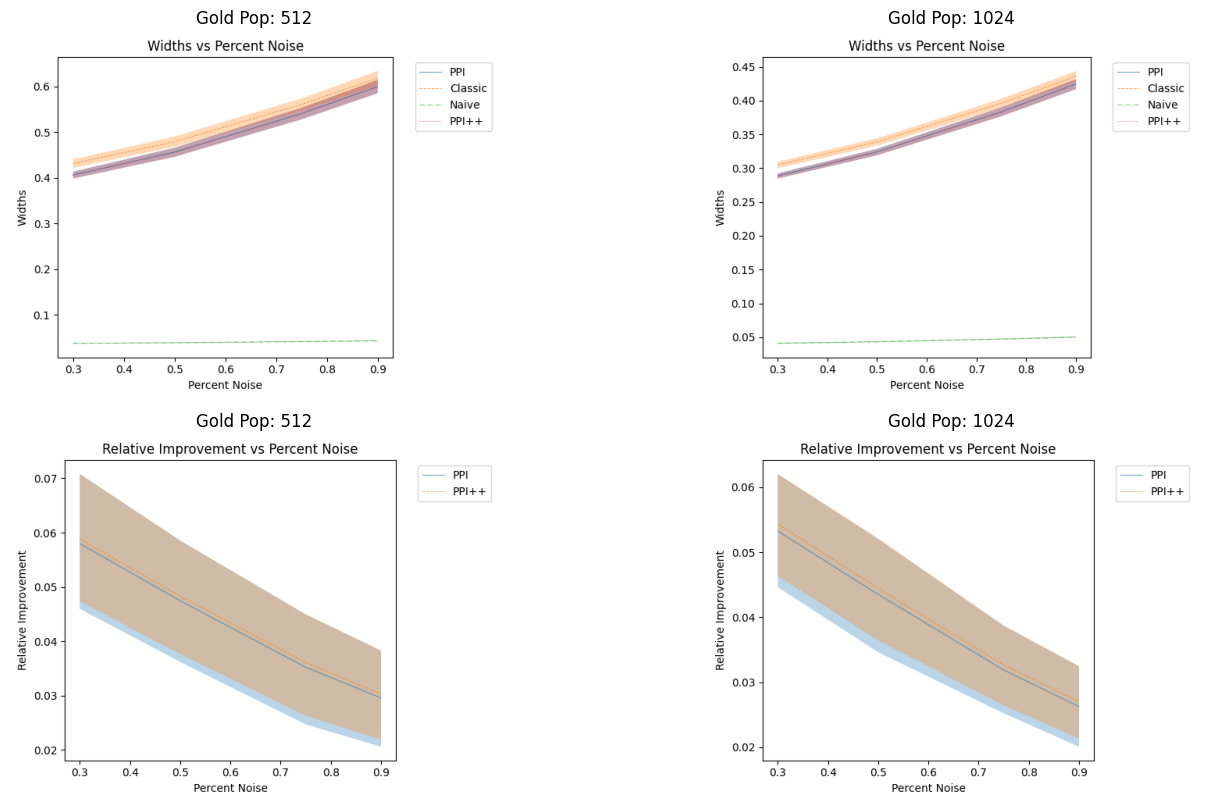

In [15]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/512g_nl_reg_2024-08-14-23-51-21/plots/widthsplot.png'
gold_16 = '../experiments/Experiment_1_new/1024g_nl_reg_2024-08-14-23-54-25/plots/widthsplot.png'
gold_128_ri = '../experiments/Experiment_1_new/512g_nl_reg_2024-08-14-23-51-21/plots/relativeimprovement.png'
gold_16_ri = '../experiments/Experiment_1_new/1024g_nl_reg_2024-08-14-23-54-25/plots/relativeimprovement.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 512')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 1024')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 512')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 1024')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


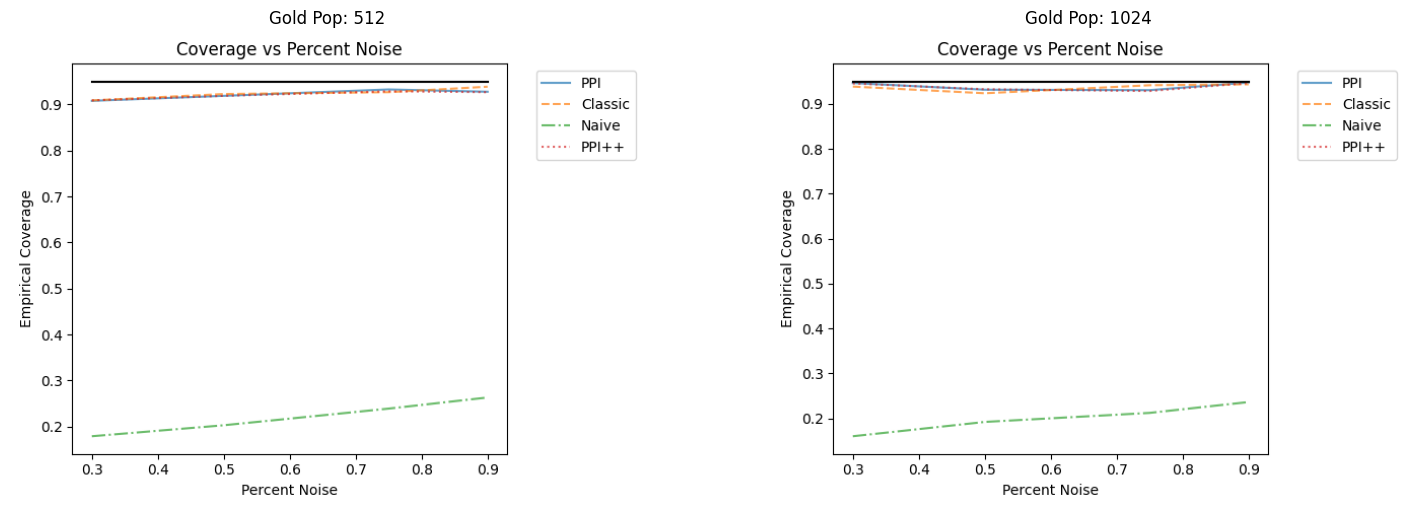

In [17]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/512g_nl_reg_2024-08-14-23-51-21/plots/coverageplot.png'
gold_16_cov = '../experiments/Experiment_1_new/1024g_nl_reg_2024-08-14-23-54-25/plots/coverageplot.png'

# Display the PNG file
img_128_cov = plt.imread(gold_16_cov)
img_16_cov = plt.imread(gold_128_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 512')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 1024')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

#### BAD model, n, GOOD N

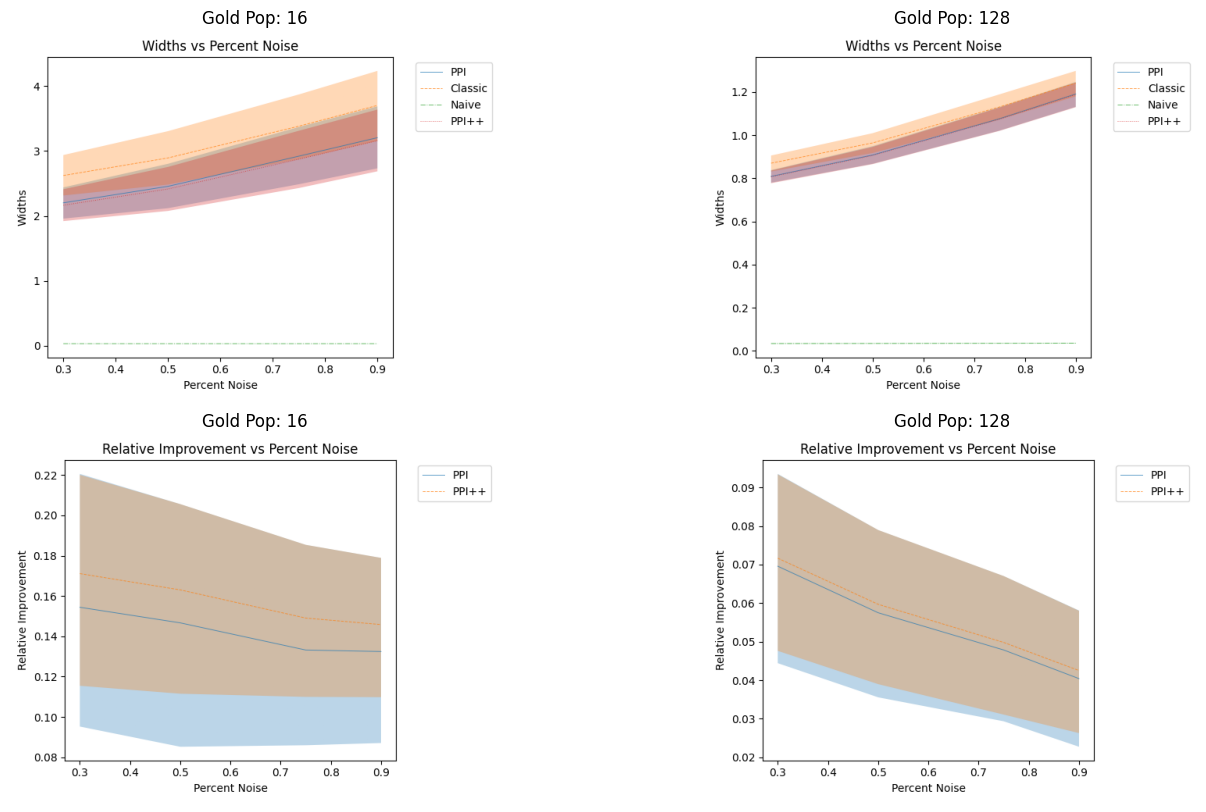

In [23]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/16g_nl_reg_2024-08-14-23-50-37/plots/widthsplot.png'
gold_16 = '../experiments/Experiment_1_new/128g_nl_reg_2024-08-13-23-13-23/plots/widthsplot.png'
gold_128_ri = '../experiments/Experiment_1_new/16g_nl_reg_2024-08-14-23-50-37/plots/relativeimprovement.png'
gold_16_ri = '../experiments/Experiment_1_new/128g_nl_reg_2024-08-13-23-13-23/plots/relativeimprovement.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 16')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 128')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 16')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 128')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


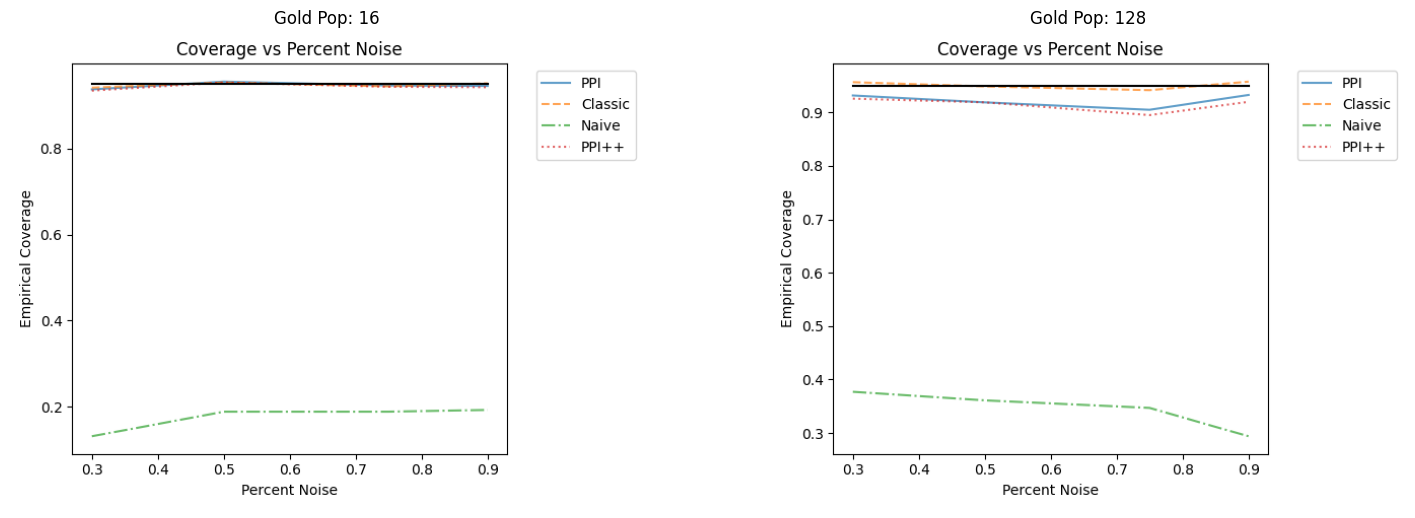

In [24]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/16g_nl_reg_2024-08-14-23-50-37/plots/coverageplot.png'
gold_16_cov = '../experiments/Experiment_1_new/128g_nl_reg_2024-08-13-23-13-23/plots/coverageplot.png'

# Display the PNG file
img_128_cov = plt.imread(gold_16_cov)
img_16_cov = plt.imread(gold_128_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 16')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 128')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

#### Small N, equal or larger n, bad model

Here $N = 512$

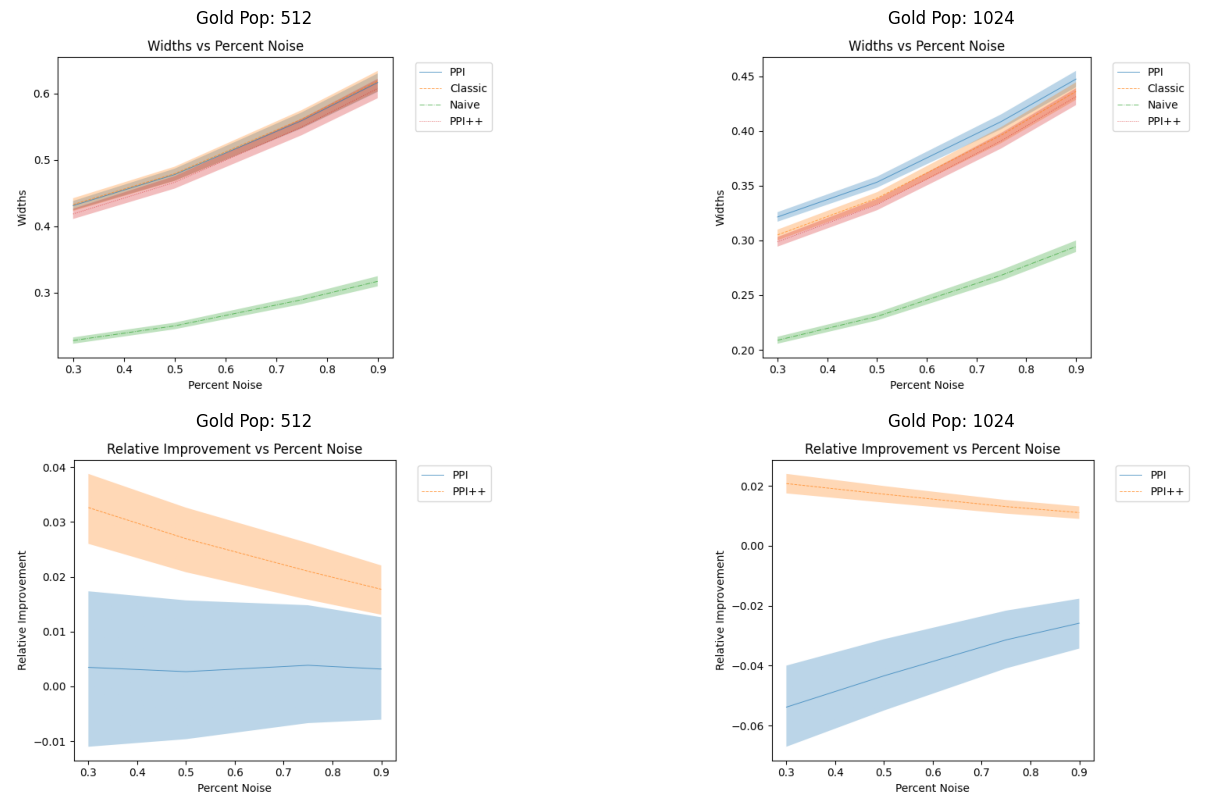

In [26]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/512g_nl_reg_1024N_2024-08-20-01-41-42/plots/widthsplot.png'
gold_16 = '../experiments/Experiment_1_new/1024g_nl_reg_1024N_2024-08-20-01-42-00/plots/widthsplot.png'
gold_128_ri = '../experiments/Experiment_1_new/512g_nl_reg_1024N_2024-08-20-01-41-42/plots/relativeimprovement.png'
gold_16_ri = '../experiments/Experiment_1_new/1024g_nl_reg_1024N_2024-08-20-01-42-00/plots/relativeimprovement.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 512')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 1024')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 512')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 1024')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


Summary:

3 things control PPI performance:

- Size of $n, N$ and value of $\hat{\sigma}_{f - Y}$

- If $N$ is large, and much larger than $n$, then the term $\hat{\sigma}_{f}/N$ is negligible

- Small $n$ proportionally benefits more from PPI, *especially* if the model is trained well
    - Compare $\hat{\sigma}_{Y}/n$ and $\hat{\sigma}_{f - Y}/n$ terms
        - If there aren't many terms, $\hat{\sigma}_{Y}$ can often be large, but if model is good, $\hat{\sigma}_{f - Y}$ is rarely large

- When $N \ll n$ isn't satisfied, *and* model is bad, there is potential for PPI to do worse than classical
    - However, PPI++ can mitigate some of these issues
    - PPI++ tends to see benefits, the closer PPI and classical widths are

- If we have both $n \ll N$ and $\hat{\sigma}_{f - Y}$ is small, PPI++ is negligible difference it doesn't do much worse if at all

- PPI provides much better performance under sufficient assumptions, and has statistical coverage guarantees over simply imputing using an ML model

- Needs no information of the model, as long as it fits well and isn't overfitting. See: XGBoost on a weird non-linear dataset.
    - Useful when applying a LLM to problems